In [36]:
import fastai
import torch
from fastai.vision import *
from shutil import copyfile
import os



In [37]:
path = '/shared/pytorch-CycleGAN-and-pix2pix/results_TFG/Colorization_Clinic_CanRuti/test_latest/images'

In [38]:
variant = os.listdir('/shared/Classification_CanRuti/VARIANT_LYMPHOCYTE')
atypical = os.listdir('/shared/Classification_CanRuti/ATYPICAL_LYMPHOCYTE')
blast = os.listdir('/shared/Classification_CanRuti/BLAST')

In [39]:
def catcher(x): return re.findall('([a-zA-Z]+_+[\d]+)', x)[0]


In [40]:
variant_png = [catcher(i)+'_fake_B_rgb.png' for i in variant]
atypical_png = [catcher(i)+'_fake_B_rgb.png' for i in atypical]
blast_png = [catcher(i)+'_fake_B_rgb.png' for i in blast]

In [41]:
#for i in variant_png:
#    copyfile(os.path.join(path,i), os.path.join("/shared/CanRuti_Fake/VARIANT_LYMPHOCYTE", i))
#    
#for i in blast_png:
#    copyfile(os.path.join(path,i), os.path.join("/shared/CanRuti_Fake/BLAST", i))
#    
#for i in atypical_png:
#    copyfile(os.path.join(path,i), os.path.join("/shared/CanRuti_Fake/ATYPICAL_LYMPHOCYTE", i))
#    

In [42]:
folder_1 = os.listdir("/shared/CanRuti_Fake/ATYPICAL_LYMPHOCYTE")
folder_2 = os.listdir("/shared/CanRuti_Fake/VARIANT_LYMPHOCYTE")
folder_3 = os.listdir("/shared/CanRuti_Fake/BLAST")
dic_Classif = {
      'ATYPICAL_LYMPHOCYTE':len(folder_1),
      'VARIANT_LYMPHOCYTE':len(folder_2),
      'BLAST':len(folder_3)
     }

pd.DataFrame(dic_Classif, index=['N'])

,ATYPICAL_LYMPHOCYTE,VARIANT_LYMPHOCYTE,BLAST
N,47,57,80


In [43]:
folder_classes = "/shared/CanRuti_Fake"
tfms = get_transforms(max_lighting=None, max_warp=None )

#### Creación del DataBunch de las imágenes de Can Ruti Fake

Aunque haya una separación del 50 por ciento en cada set, solo se utilizará un conjunto de validación para el test, el de training se ignorará

In [44]:
data = (ImageList.from_folder(folder_classes) #Where to find the data? -> in path and its subfolders
        .split_by_rand_pct(0.5,seed=1)           #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .transform(tfms, size=64)       #Data augmentation? -> use tfms with a size of 64
        .databunch()
        .normalize(imagenet_stats))   

In [45]:
data.batch_size = 20

#### Descripción del Conjunto de datos Can Ruti Fake

In [46]:
pd.DataFrame.from_dict({'Number of classes':[data.c],
'train_size':[len(data.train_ds)],
'valid_size':[len(data.valid_ds)]},
orient = 'index', columns=['N'])

,N
Number of classes,3
train_size,92
valid_size,92


#### Conteo de clases del conjunto de training de datos Can Ruti Fake

In [47]:
train_ds = data.train_ds.to_df()
pd.DataFrame(train_ds['y'].value_counts()).rename(columns={'y':'N'})

,N
BLAST,43
VARIANT_LYMPHOCYTE,25
ATYPICAL_LYMPHOCYTE,24


#### Conteo de clases del conjunto de validación de datos Can Ruti Fake

In [48]:
valid_ds = data.valid_ds.to_df()
pd.DataFrame(valid_ds['y'].value_counts()).rename(columns={'y':'N'})

,N
BLAST,37
VARIANT_LYMPHOCYTE,32
ATYPICAL_LYMPHOCYTE,23


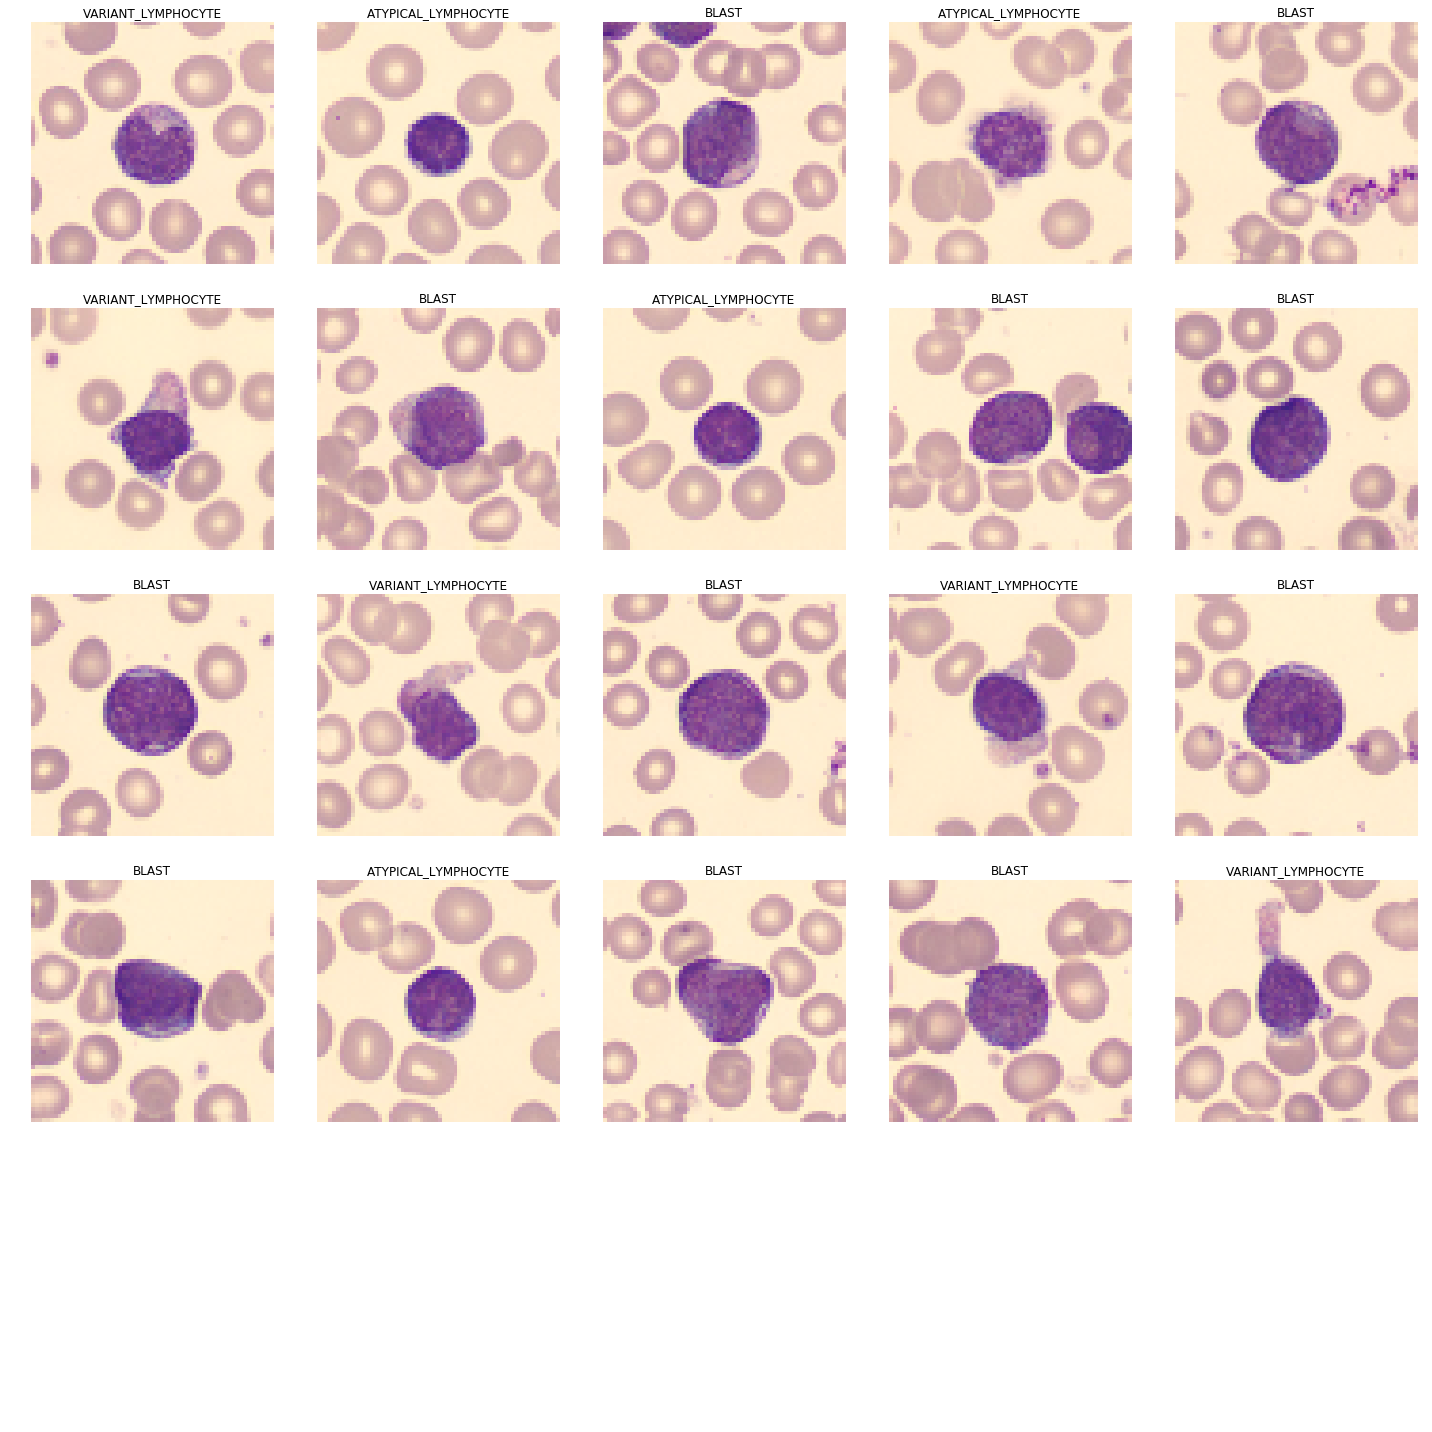

In [49]:
data.show_batch()

# Resnet 18 Preentrenada en Clinic Test en Fake CanRuti

In [50]:
folder_classes = "/shared/Classification_Clinic_Balanced"

data_aux = (ImageList.from_folder(folder_classes) #Where to find the data? -> in path and its subfolders
        .split_by_rand_pct()           #How to split in train/valid? -> use the folders
        .label_from_folder()    
        .databunch()
        )
learn = None
learn = cnn_learner(data_aux, models.resnet18, metrics=[error_rate, accuracy], pretrained='imagenet').load('stage-2-18-Clinic_Balanced')
learn.data = data


In [51]:
results = learn.validate(data.valid_dl)

valid_CanRuti = dict(zip(['valid_loss', 'error_rate', 'accuracy'],
                         [results[0], results[1].item(),results[2].item()]))

pd.DataFrame(valid_CanRuti, index = ['metrics'])

,valid_loss,error_rate,accuracy
metrics,1.310246,0.554348,0.445652


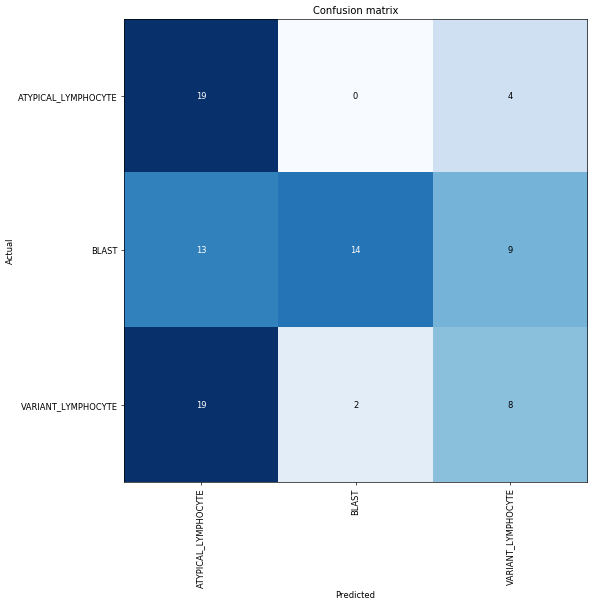

In [52]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)




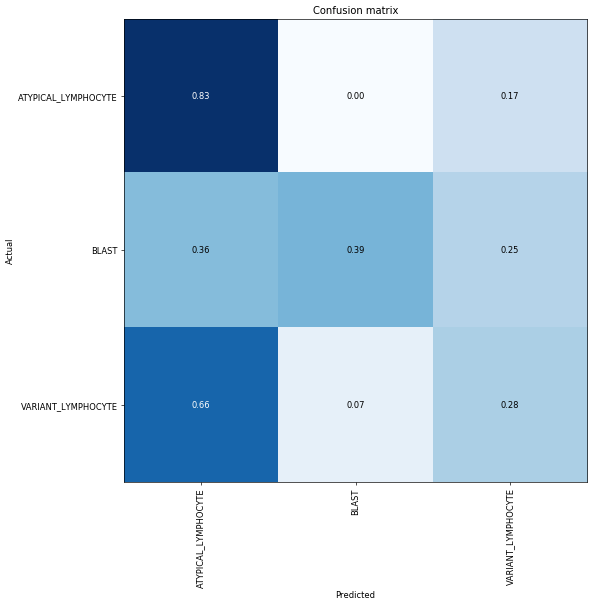

In [53]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60, normalize=True)

In [28]:
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

In [235]:
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

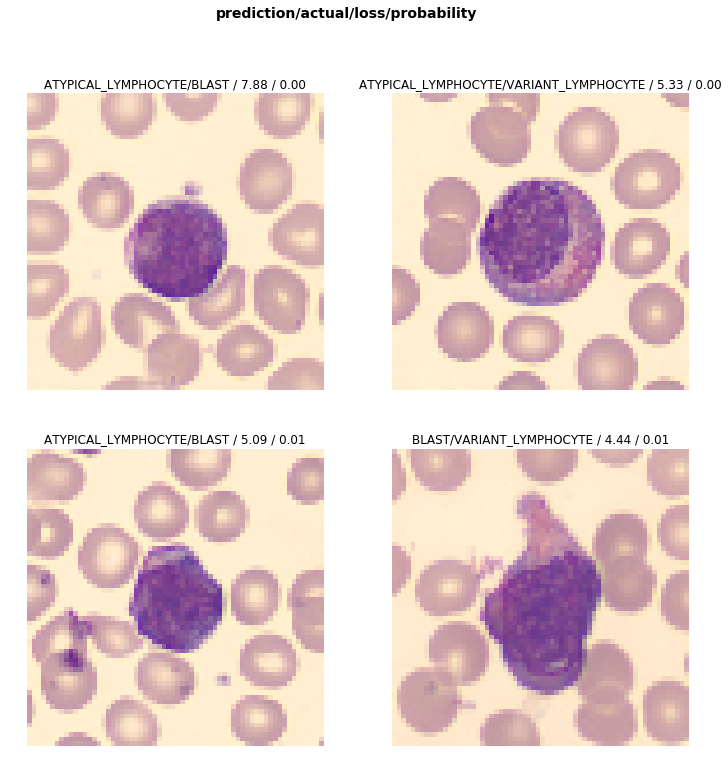

In [29]:
interp.plot_top_losses(4)




# Resnet 34 Preentrenada en Clinic Test en Fake CanRuti

In [30]:
data_aux = (ImageList.from_folder(folder_classes) #Where to find the data? -> in path and its subfolders
        .split_by_rand_pct()           #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .databunch())
learn = None
learn = cnn_learner(data_aux, models.resnet34, metrics=[error_rate, accuracy],
                    pretrained='imagenet').load('stage-2-34-Clinic_Balanced')
learn.data = data



In [31]:
results = learn.validate(data.valid_dl)

valid_CanRuti = dict(zip(['valid_loss', 'error_rate', 'accuracy'],
                         [results[0], results[1].item(),results[2].item()]))

pd.DataFrame(valid_CanRuti, index = ['metrics'])

,valid_loss,error_rate,accuracy
metrics,2.097689,0.576087,0.423913


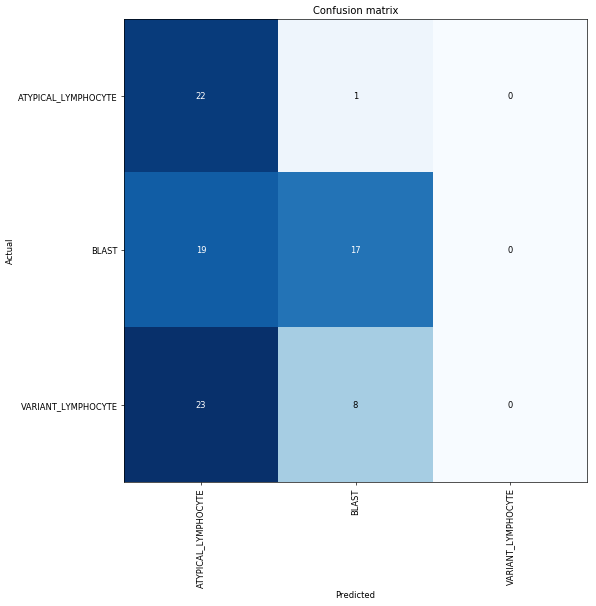

In [32]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

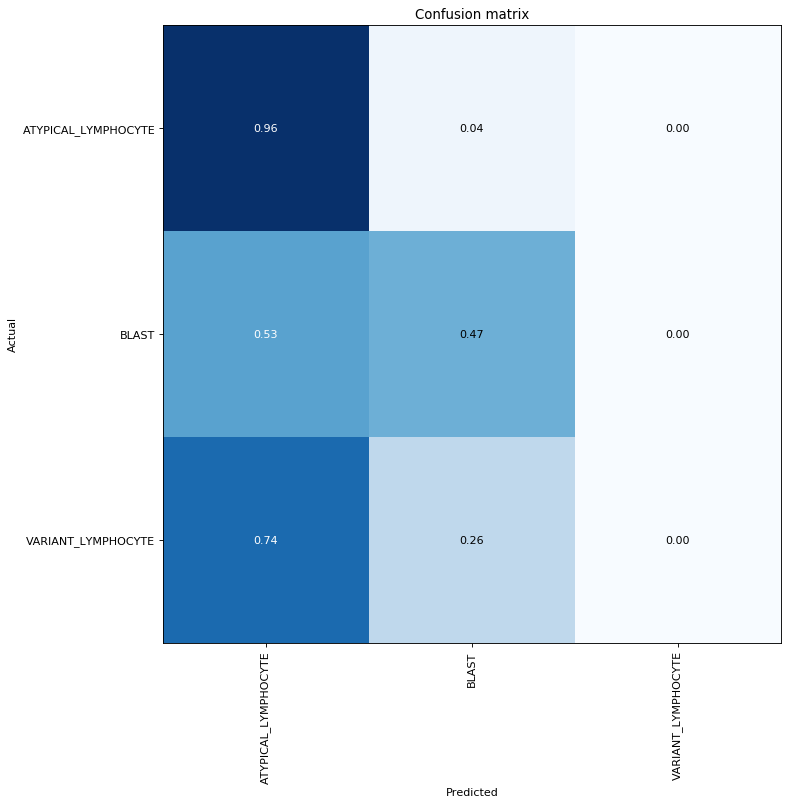

In [33]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=80, normalize=True)

In [34]:
len(data.valid_ds)==len(losses)==len(idxs)

True

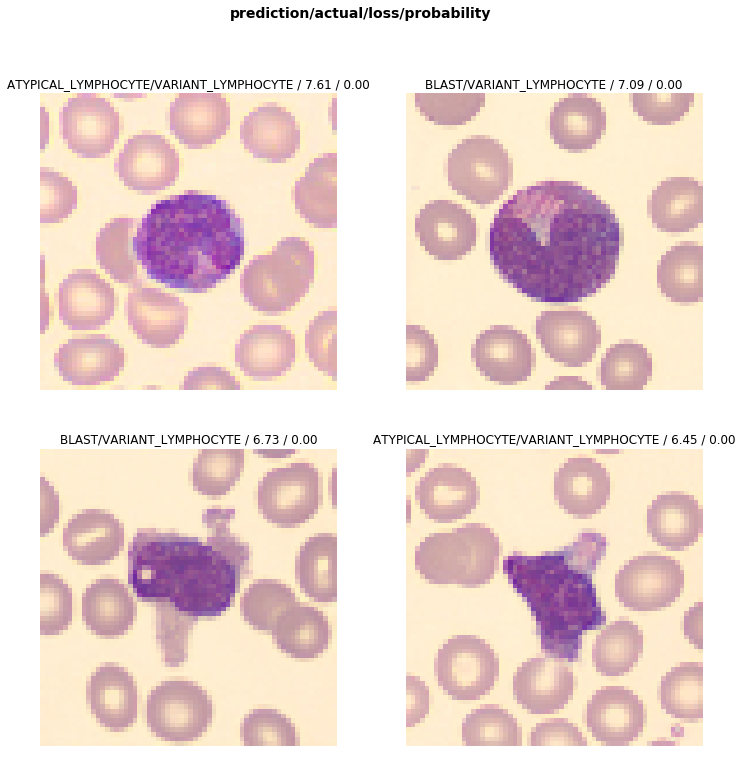

In [35]:
interp.plot_top_losses(4)